In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd

In [2]:
import networkx as nx
import numpy as np
from scipy.linalg import expm, sinm, cosm
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from tqdm import tqdm
from numpy import linalg as LA



def entropy(G,steps):
    w=nx.laplacian_spectrum(G)
    t1=np.log10(1/np.max(w[w>1e-10]))
    t2=np.log10(10/np.min(w[w>1e-10]))
    t = np.logspace(t1,t2, int(steps))
    cont=0
    S=np.zeros(len(t))
    VarL=np.zeros(len(t))
    #N=len(HG.nodes())
    
    #L=nx.laplacian_matrix(G)
    #L1=L.todense()      
    Len=np.zeros(len(t))

    
    for tau in tqdm(t):      
        Tr=np.nansum(np.exp(-tau*w))
        T1=np.divide(np.exp(-w*tau),Tr)
        S[cont]=-np.nansum(T1*np.log(T1))/np.log(N)
        Med=np.nansum(np.multiply(w,np.exp(-tau*w)))/Tr
        Sqr=np.nansum(np.multiply(np.multiply(w,w),np.exp(-tau*w)))/Tr
        VarL[cont]=(Sqr-Med*Med)
        cont=cont+1
        
    dS=np.log(N)*np.diff(1-S)/np.diff(np.log(t))
    return 1-S,dS,VarL, t

<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
100%|██████████| 1000/1000 [00:00<00:00, 12440.17it/s]


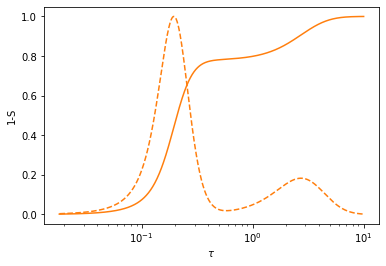

In [3]:
import numpy as np
from scipy.linalg import expm, sinm, cosm
import matplotlib.pyplot as plt
from numpy import linalg as LA
import networkx as nx
import random

#Code to generate the weighted Laplacian
#A=np.copy(arr1)
#D=np.abs(A).sum(axis=1)
#L=np.diag(D)-A


N=512
#Make graph
seed = random.randint(1,int(1e5))  # seed random number generator
nb=int(N/4)
sizes = [nb,nb,nb,nb]
kint=128/N
kext=1/N
probs = [[kint, kext, kext, kext], [kext, kint, kext, kext], [kext, kext, kint, kext], [kext, kext, kext, kint]]
#Generate the graph
G = nx.stochastic_block_model(sizes, probs, seed=seed)

N=len(G.nodes())

[S1,dS1,VarL1,t1]=entropy(G,1000)

plt.plot(t1,S1,label='ER-05',color='C1')
t11 = (t1[1:]+t1[:-1])/2.0
plt.plot(t11,dS1/np.max(dS1),ls='--',color='C1')


plt.ylabel('1-S')
plt.xlabel(r'$\tau$')

plt.xscale('log')

    

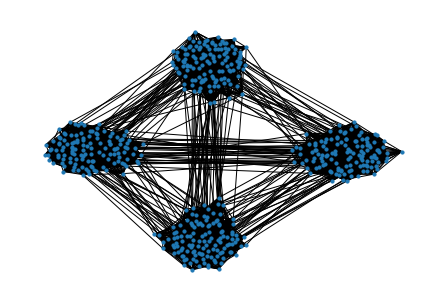

In [4]:
nx.draw(G,node_size=10)